# PH413 Computation Physics - Practice [Week 7]

## 1. Matplotlib Animations


* Matplotlib is convenient tool for generating animations, particularly with the fact that Matplotlib is a great tool for plot generation.

* But, the docstring (i.e., python documentation string) of matplotlib animation functions are quite complex. It'll be much easier to dive in with some demos.

* The easiest way to make a live animation in Matplotlib is to use one of the Animation classes: 
    * Animation: A base class for Animations.
    * FuncAnimation: Makes an animation by repeatedly calling a function func.
    * ArtistAnimation: Animation using a fixed set of Artist objects.
    
* Let's see how to use FuncAnimation class.

## 1.1. FuncAnimation

* Please compile the following code.

In [1]:
import matplotlib.animation as animation
print(animation.writers.list())

['pillow', 'ffmpeg', 'ffmpeg_file', 'imagemagick', 'imagemagick_file', 'html']


In [2]:
animation

<module 'matplotlib.animation' from '/home/mmaile/.local/lib/python3.10/site-packages/matplotlib/animation.py'>

* If it does not contain 'ffmpeg', go to your anaconda prompt and install the code with following code.
```bash
conda install -c menpo ffmpeg
```

* Writer Descriptions
    * The Pillow writer relies on the Pillow (PIL: Python Imaging Library) library to write the animation, keeping all data in memory.
    * The HTML writer generates JavaScript-based animations.
    * The pipe-based writers (e.g., FFMpegWriter) stream the captured frames over a pipe to an external process. The pipe-based variants tend to be more performant, but may not work on all systems.
    * The file-based writers (e.g., FFMpegFileWriter) save temporary files for each frame which are stitched into a single file at the end. Although slower, these writers can be easier to debug.



In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
#from IPython.display imp|ort HTML

<class 'matplotlib.lines.Line2D'>


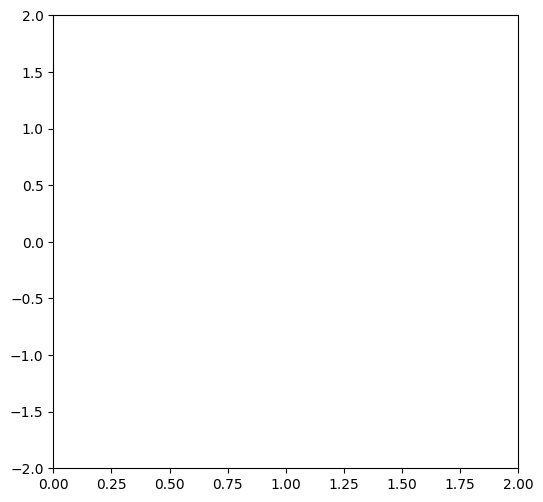

In [4]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
line, = ax.plot([], [])

print(type(line))

In [5]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    
    line.set_data(x, y)
    return (line,)


# call the animator. blit=True means only re-draw the parts that have changed so that the animations display much more quickly.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)


print(type(anim))

<class 'matplotlib.animation.FuncAnimation'>


* Now, you can export your animation object to various form.
 * mp4 format by ffmpeg
 * html format by html
 * in-line display by changing rcparamerers

In [6]:
anim.save('hello.mp4', writer = 'ffmpeg')

In [7]:
anim.save('hello.html', writer='html')

In [8]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [9]:
anim

## 1.2. ArtistAnimation

* Although the FuncAnimation is useful, 'update' approach can be redundant if you already have a calculated data to draw.
* For those cases, you can directly use the data as pyplot frame by applying the `ArtistAnimation` class.
* This is particularly useful when you don't have a specific 'function' to draw. In other words, you can simply export the 'sequence of pyplot figures' into mp4 file or other format you want.

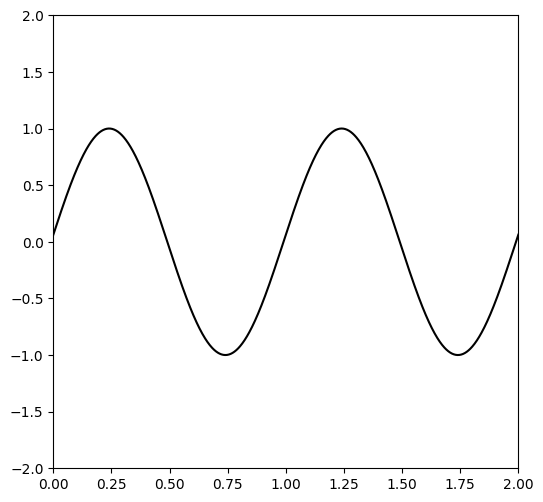

In [10]:
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

# animation function. This is called sequentially
def animate(j):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * j))
    
    line, = ax.plot(x, y, color='k')
    return line

imgs = []
for i in range(100):
    img = animate(i)
    imgs.append([img])
    
ani = animation.ArtistAnimation(fig, imgs, interval=20, blit=True)

ani

**======================== ★ Task 1 ★ ========================**
* By using the given code, generate the animation by mimicing the animation 'task_1.mp4'
```python
x = np.linspace(0, 2, 1000)
y = np.sin(2*np.pi*((x - 0.005*i)*10))*np.sin(2 * np.pi * (x - 0.01*i))
```
    
**==========================================================**

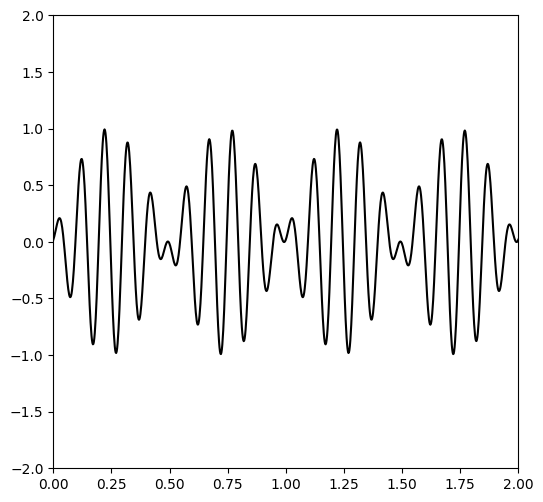

In [12]:
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2*np.pi*((x - 0.005*i)*10))*np.sin(2 * np.pi * (x - 0.01*i))
    
    line, = ax.plot(x, y, color='k')
    return line

imgs = []
for i in range(100):
    img = animate(i)
    imgs.append([img])
    
ani = animation.ArtistAnimation(fig, imgs, interval=20, blit=True)

ani

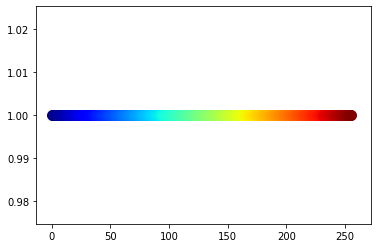

In [11]:
# Hint for Optional Task

# 1. You'll need a jet colormap (cm).

jet = plt.cm.jet
for i in range(256):
    plt.scatter([i],[1], color=jet(i), s=100)
    
# 2. In order to draw a line with different color, it would be better to use 'scatter' function.
# 3. How can you change the offsets (positions) and color of the scatter plot?  -> use `set_offset` and `set_color` functions.

## 2. Network Construction

### 2.1. Network Initialization

* `networkx` helps you to store and visulalize network structures.
* It supports natural connection with `matplotlib`, which makes drawing process much easier. 

* If `networkx` is not installed in your python, go to your conda prompt and  install with the following command

```bash
conda install -c conda-forge networkx
```

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import networkx as nx

nx.__version__

'2.8'

* By definition, a Graph (or network) is a collection of objects (called nodes or vertices) along with identified pairs of the objects (called an edge or link).

* `nx.Graph()` create an empty graph structure (a “null graph”) with no nodes and no edges.
* A `Graph` class stores nodes and edges with optional data, or attributes.
* A `Graph` hold undirected edges. Self loops are allowed but multiple (parallel) edges are not.

In [24]:
G = nx.Graph()

* You can freely add nodes from various sources.
 * Node number
```python
G.add_node(1)
```
 * Node number list
 ```python
G.add_nodes_from([2,3])
```
 * Other graphs
 ```python
# The path graph is a tree with two nodes of vertex degree 1, and the other. e.g., (0)-(1)-(2)-...(L-1)
H = nx.path_graph(10)
G.add_nodes_from(H)
```
 * You can even add a whole graph as a node of other graph!
```python
G.add_node(H)
```
 
* After the addition, we can verify which nodes are included in the graph `G` via `G.nodes()`.

In [25]:
# Try add some nodes on your empty graph G.

G.add_node(1)
G.add_nodes_from([2,5,6])
print(G.nodes)

[1, 2, 5, 6]


In [26]:
# Note that 'G.nodes' is not a list but NodeView object.
# To convert 'G.nodes' into a list, use the 'list' constructor.

print(type(G.nodes))
print(list(G.nodes))

<class 'networkx.classes.reportviews.NodeView'>
[1, 2, 5, 6]


* In same manner, edge can be added.
 * Node number which consists edges
```python
G.add_edge(1,2)
```
 * Edge list
 ```python
G.add_edges_from([(1, 2), (1, 3)])
```
 * Edges from other graph
```python
G.add_edges_from(H.edges)
```
 
* After the addition, we can verify it via `G.edges()`.
* You can clear the whole graph (to empty graph) with `G.clear()`.


In [27]:
G.clear()

G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

print('# of nodes : ' + str(G.number_of_nodes()))
print('# of edges : ' + str(G.number_of_edges()))
print('Node list : ' + str(G.nodes()))
print('Edge list : ' + str(G.edges()))
print('Adjacency list : ' + str(G.adj))
print('Degree : ' + str(G.degree()))

# of nodes : 8
# of edges : 3
Node list : [1, 2, 3, 'spam', 's', 'p', 'a', 'm']
Edge list : [(1, 2), (1, 3), (3, 'm')]
Adjacency list : {1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}, 'm': {}}, 'spam': {}, 's': {}, 'p': {}, 'a': {}, 'm': {3: {}}}
Degree : [(1, 2), (2, 1), (3, 2), ('spam', 0), ('s', 0), ('p', 0), ('a', 0), ('m', 1)]


 * As addition, you can perform deletion of nodes and edges.

In [28]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(G.nodes())
G.remove_edge(1, 3)
print(G.edges())

[1, 3, 'spam']
[]


* Subscript notation can be employed to access edges and neighbors of node.
 * Neighbor : `G[1]`
 * Edge : `G[1][2]`
* By accessing the attributes of nodes and edges, you can change them in order to match your data structure.

In [29]:
G.clear()
G.add_nodes_from([1,2,3])
G.add_edge(1, 2)
G.add_edge(1, 3)
G[1][2]['color'] = "red"
G[1][3]['color'] = "blue"
print(G[1])
print(G[1][3])

{2: {'color': 'red'}, 3: {'color': 'blue'}}
{'color': 'blue'}


In [30]:
G.clear()
G.add_node(1, age = '21', sex = 'M')
G.add_node(2, age = '23', sex = 'F')
G.add_node(3, age = '24', sex = 'M')
print(G.nodes.data())
G.add_edges_from([(1,2,{'weight' : 0.56}), (1,3,{'weight' : 2.31})])
print(G.edges.data())

[(1, {'age': '21', 'sex': 'M'}), (2, {'age': '23', 'sex': 'F'}), (3, {'age': '24', 'sex': 'M'})]
[(1, 2, {'weight': 0.56}), (1, 3, {'weight': 2.31})]


* If you want to specify the direction of edges, use `Digraph` class instead, a base class for directed graphs.
* A `DiGraph` stores nodes and edges with optional data, or attributes.
* `DiGraphs` hold directed edges. Self loops are allowed but multiple (parallel) edges are not.

In [31]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

print(DG.out_degree(1, weight='weight'))
print(DG.degree(1, weight='weight'))
print(list(DG.neighbors(1)))

0.5
1.25
[2]


### 2.2. Network generators

* Without maually specify all of the nodes and edges, you can generate networks from various generator functions.

In [32]:
K_5 = nx.complete_graph(5)

K_3_5 = nx.complete_bipartite_graph(3, 5)

barbell = nx.barbell_graph(10, 10)

lollipop = nx.lollipop_graph(10, 20)

er = nx.erdos_renyi_graph(100, 0.15)

ws = nx.watts_strogatz_graph(30, 3, 0.1)

ba = nx.barabasi_albert_graph(100, 5)

* You can analyze the functions with graph-theoretic functions.

In [33]:
print(list(nx.connected_components(G)))
print(sorted(d for n, d in G.degree()))
print(nx.clustering(G))
print(list(nx.shortest_path_length(G)))

[{1, 2, 3}]
[1, 1, 2]
{1: 0, 2: 0, 3: 0}
[(1, {1: 0, 2: 1, 3: 1}), (2, {2: 0, 1: 1, 3: 2}), (3, {3: 0, 1: 1, 2: 2})]


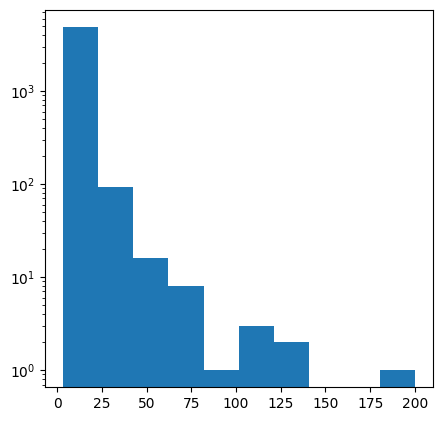

In [34]:
# example of degree distribution

ba = nx.barabasi_albert_graph(5000, 3)
degrees = [v[1] for v in ba.degree]

fig = plt.figure(figsize=(5, 5), dpi=100)

plt.hist(degrees)
plt.yscale('log')

* But how can we 'see' those graphs? 
* It's super simple, you just 'draw' it!

## 3. Network Visualization

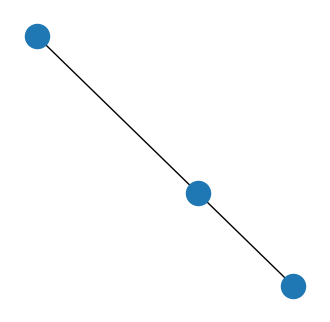

In [35]:
fig = plt.figure(figsize = (4,4), dpi=100)

ax = fig.add_subplot(111)
nx.draw(G, pos=None, ax = ax)

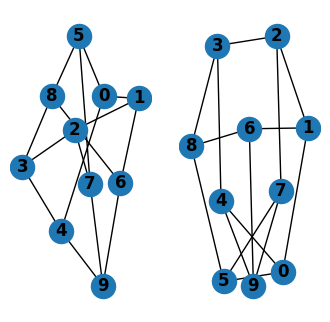

In [39]:
G = nx.petersen_graph()

fig = plt.figure(figsize = (4,4), dpi=100)

ax = fig.add_subplot(121)
nx.draw(G, ax = ax, with_labels=True, font_weight='bold')

ax = fig.add_subplot(122)
nx.draw_kamada_kawai(G, ax = ax, with_labels=True, font_weight='bold')

* You can change all of the drawing attributes by drawing node, edges, and labels seperately.
* Also, position specification and layout speficiation is possible.

(-0.10500000000000001, 1.105, -0.21000000000000002, 2.21)

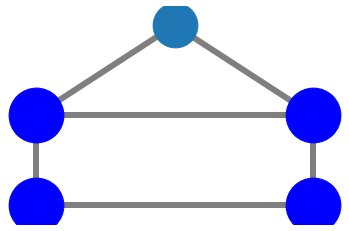

In [40]:
G = nx.house_graph()
# explicitly set positions
pos = {0: (0, 0),
       1: (1, 0),
       2: (0, 1),
       3: (1, 1),
       4: (0.5, 2.0)}

nx.draw_networkx_nodes(G, pos, node_size=2000, nodelist=[4])
nx.draw_networkx_nodes(G, pos, node_size=3000, nodelist=[0, 1, 2, 3], node_color='b')
nx.draw_networkx_edges(G, pos, alpha=0.5, width=6)
plt.axis('off')

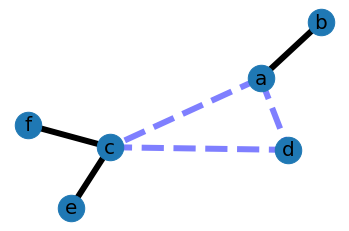

In [27]:
G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

**======================== ★ Assignment 1 ★ ========================**

* Generate Erdos-Renyi random graph G(100, 0.1) without using the network generator function `nx.erdos_renyi_graph`.

    * It means that your network G should have 100 nodes, and each nodes have a 0.1 probability of connected with each of other node.

* Color the node into blue if the node has degree greater than 5, and red otherwise.
 
**==========================================================**

In [6]:
import numpy.random
import networkx as nx
import matplotlib.pyplot as plt

def myErdos_Renyi(nodes, prob):
    G = nx.Graph()
    G.add_nodes_from(range(0, nodes))
    for i in range(0,nodes):
        for j in range(i+1, nodes):
            p = numpy.random.rand(1)
            if p < prob:
                G.add_edge(i,j)
    return G


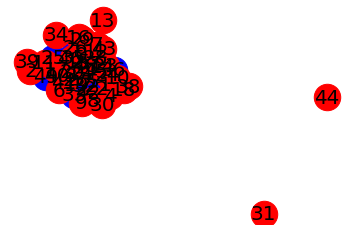

In [9]:
nodes = 50 # this should be 100 but it looks terrible
G = myErdos_Renyi(nodes,.1)

pos = nx.spring_layout(G)  # positions for all nodes

 
nlarge = [(node) for (node, degree) in G.degree() if degree > 5]
nsmall = [(node) for (node, degree) in G.degree() if degree <= 5]


# nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist = nlarge,
                       node_color='b',
                       node_size=700)
nx.draw_networkx_nodes(G, pos,
                       nodelist = nsmall,
                       node_color='r',
                       node_size=700)

# edges
nx.draw_networkx_edges(G, pos,
                       width=6)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

## END OF WEEK 7! Have a good day :)